In [67]:
import numpy as np
from pyit2fls import T1TSK, T1FS, tri_mf, trapezoid_mf
import matplotlib.pyplot as plt


# 1. Uruchom plik tipper_tsk.py. Jest to tradycyjny akademicki przykład systemu wnioskowania rozmytego, ale tym razem zdefiniowany jako system wnioskowania TSK

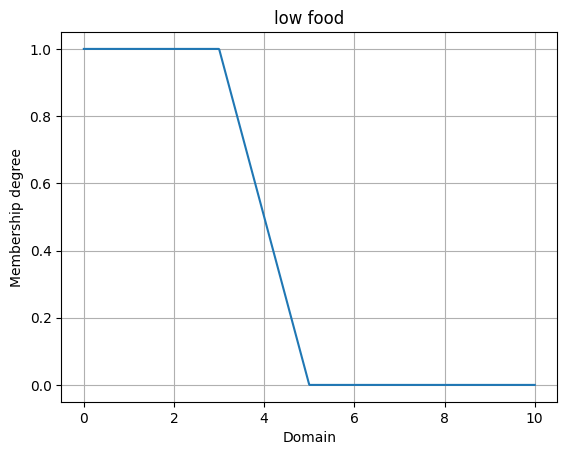

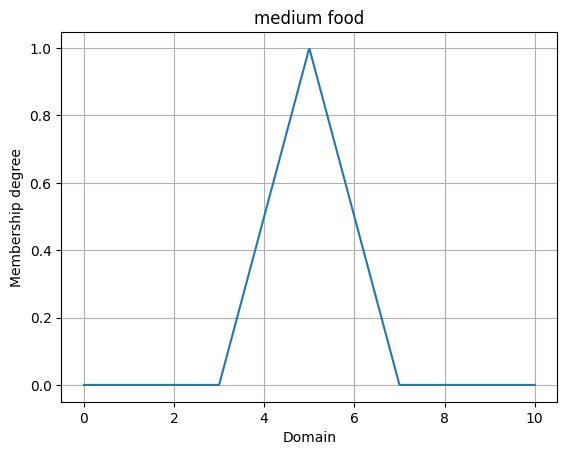

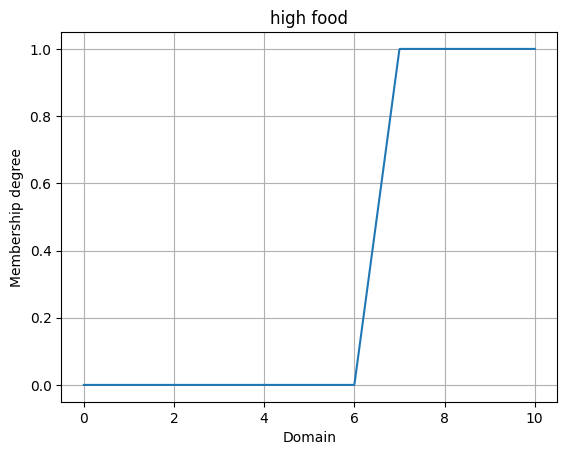

In [68]:
import numpy as np
from pyit2fls import T1TSK, T1FS, tri_mf, trapezoid_mf
import matplotlib.pyplot as plt

# definiujemy że uniwersum jakości jedzenia to zbiór od 0 do 10 (skala punktowa)
food_universe = np.linspace(0.0, 10.0, 1000)
# definiujemy że uniwersum jakosci obsługi to zbiór od 0 do 10
service_universe = np.linspace(0.0, 10.0, 1000)                             

# wejście 1
# definiujemy zbiory rozmyte
# świadomie wykroczono poza uniwersum, gdyż biblioteka nie pozwala
# podać dwóch takich samych wartości obok siebie
low_production = T1FS(food_universe, trapezoid_mf, [-1, 0, 3, 5, 1.0])
low_production.plot('low food')
medium_food = T1FS(food_universe, tri_mf, [3, 5, 7, 1.0])
medium_food.plot('medium food')
high_food = T1FS(food_universe, trapezoid_mf, [6, 7, 10, 11, 1.0])
high_food.plot('high food')

# wejście 2
low_service = T1FS(service_universe, trapezoid_mf, [-1, 0, 3, 5, 1.0])
medium_service = T1FS(service_universe, tri_mf, [3, 5, 7, 1.0])
high_service = T1FS(service_universe, trapezoid_mf, [6, 7, 10, 11, 1.0])

# definiujemy funkcje liniowe dwuargumentowe
# w przykładzie mamy 2 zmienne, zatem jest to funkcja dwóch zmiennych
# oraz parametru wolnego
def low_tip(x1, x2):
    return 0 + 0.5 * x1 + 0.5 * x2


def medium_tip(x1, x2):
    return 0 + 0.7 * x1 + 0.7 * x2


def high_tip(x1, x2):
    # pominięto tutaj współczynnki zmiennych, ale są po prostu równe 1
    return 0 + x1 + x2


# definiujemy sterownik rozmyty TSK
controller = T1TSK()
# są 2 wejścia, jedno wyjście
controller.add_input_variable('food')
controller.add_input_variable('service')
controller.add_output_variable('tip')

# reguły TSK
# poprzednik składa się tak jak we wnioskowaniu Mamdaniego
# ze zbiorów rozmytych połączych spójnikami rozmytymi
# natomiast następnik jest wcześniej zdefiniowaną funkcją

controller.add_rule([('food', low_production), ('service', low_service)], [('tip', low_tip)])
controller.add_rule([('food', low_production), ('service', medium_service)], [('tip', low_tip)])
controller.add_rule([('food', low_production), ('service', high_service)], [('tip', medium_tip)])

controller.add_rule([('food', medium_food), ('service', low_service)], [('tip', low_tip)])
controller.add_rule([('food', medium_food), ('service', medium_service)], [('tip', medium_tip)])
controller.add_rule([('food', medium_food), ('service', high_service)], [('tip', medium_tip)])

controller.add_rule([('food', high_food), ('service', low_service)], [('tip', medium_tip)])
controller.add_rule([('food', high_food), ('service', medium_service)], [('tip', high_tip)])
controller.add_rule([('food', high_food), ('service', high_service)], [('tip', high_tip)])

### Podstaw wejścia (odpowiednio Quality i Service): [0, 0], [10, 0], [0, 10], [10, 10], [5, 5], [0, 5], [5, 0]. Jak zachowuje się system wnioskowania w tych sytuacjach? Czy jest to zgodne z oczekiwaniem?

In [69]:
# podajemy ostre wejścia i uzyskujemy wyjście
# biblioteka wymaga powtórzenia wejść ostrych jako argumentów funkcji na wyjściu

values = [ [0, 0], [10, 0], [0, 10], [10, 10], [5, 5], [0, 5], [5, 0] ]

for value in values:
    food, service = value
    it2out = controller.evaluate({"food": food, "service": service}, (food, service))
    # print(it2out) # tutaj dostajemy słownik wszystkich wyjść
    print(f"tip for food: {food} and service: {service} should be: {it2out['tip']:.2f}%") # tutaj możemy pobrać konkretną wartość wyjścia

tip for food: 0 and service: 0 should be: 0.00%
tip for food: 10 and service: 0 should be: 7.00%
tip for food: 0 and service: 10 should be: 7.00%
tip for food: 10 and service: 10 should be: 20.00%
tip for food: 5 and service: 5 should be: 7.00%
tip for food: 0 and service: 5 should be: 2.50%
tip for food: 5 and service: 0 should be: 2.50%


Jest to zgodne z oczekiwaniem, system dziala zgodnie ze zdefiniowanymi regulami. Im wieksza jakosc uslug i jedzenia tym wyzszy procentowo napiwek.

### Podstaw wejścia Quality: 6.5, Service: 5. Czy potrafisz wyprowadzić na podstawie stopnia odpalenia reguł i funkcji w następnikach reguł, jak zostało obliczone wyjście?

In [70]:
food, service = (6.5, 5)
it2out = controller.evaluate({"food": food, "service": service}, (food, service))
print(f"tip for food: {food} and service: {service} should be: {it2out['tip']:.2f}%") 

tip for food: 6.5 and service: 5 should be: 10.35%


In [71]:
def get_values_of_membership_functions(membership_functions, value):
    for name, function in membership_functions:
        print(f"{name}({value}) = {function(value)}")

get_values_of_membership_functions([("low_food", low_production), ("medium_food", medium_food), ("high_food", high_food)], food)
print()
get_values_of_membership_functions([("low_service", low_service), ("medium_service", medium_service), ("high_service", high_service)], service)

low_food(6.5) = 0.0
medium_food(6.5) = 0.25
high_food(6.5) = 0.5

low_service(5) = 0.0
medium_service(5) = 1.0
high_service(5) = 0.0


In [72]:
def show_output_calculations(rules):
    rules_eval = [] 

    for rule  in controller.rules:
        food_mf_value = rule[0][0][1](food)
        service_mf_value = rule[0][1][1](service)
        
        firing_strength = min(food_mf_value, service_mf_value)
        
        rule_tip = rule[1][0][1](food, service)
        
        print(f"| firing_strength = min({food_mf_value:.2f}, {service_mf_value:.2f}) = {firing_strength:.2f} | rule_tip: {rule_tip} |")
        
        rules_eval.append({
        "firing_strength": firing_strength,
        "rule_tip": rule_tip  
        })

    print()

    numerator = ''
    denominator = ''

    for eval in rules_eval:
        firing_strength, rule_tip = eval['firing_strength'], eval['rule_tip'] 
        
        numerator += f"{firing_strength} * {rule_tip} + "
        denominator += f"{firing_strength} + "

    print(f"{numerator[:-3]} / {denominator[:-3]} = {it2out['tip']:.2f}")

    

In [73]:
show_output_calculations(controller.rules)

| firing_strength = min(0.00, 0.00) = 0.00 | rule_tip: 5.75 |
| firing_strength = min(0.00, 1.00) = 0.00 | rule_tip: 5.75 |
| firing_strength = min(0.00, 0.00) = 0.00 | rule_tip: 8.05 |
| firing_strength = min(0.25, 0.00) = 0.00 | rule_tip: 5.75 |
| firing_strength = min(0.25, 1.00) = 0.25 | rule_tip: 8.05 |
| firing_strength = min(0.25, 0.00) = 0.00 | rule_tip: 8.05 |
| firing_strength = min(0.50, 0.00) = 0.00 | rule_tip: 8.05 |
| firing_strength = min(0.50, 1.00) = 0.50 | rule_tip: 11.5 |
| firing_strength = min(0.50, 0.00) = 0.00 | rule_tip: 11.5 |

0.0 * 5.75 + 0.0 * 5.75 + 0.0 * 8.05 + 0.0 * 5.75 + 0.25 * 8.05 + 0.0 * 8.05 + 0.0 * 8.05 + 0.5 * 11.5 + 0.0 * 11.5 / 0.0 + 0.0 + 0.0 + 0.0 + 0.25 + 0.0 + 0.0 + 0.5 + 0.0 = 10.35


### Zdefiniuj dodatkowo regułę, która sprawi, że dla ocen poniżej 2,0 na jakiejkolwiek zmiennej spowoduje, że nie zostanie na pewno dany żaden napiwek. Wykorzystaj stałą funkcję na wyjściu reguły. Dodaj kolejne zbiory rozmyte do wejść, zmodyfikuj definicje bieżących zbiorów rozmytych, aby całość zachowała sens.

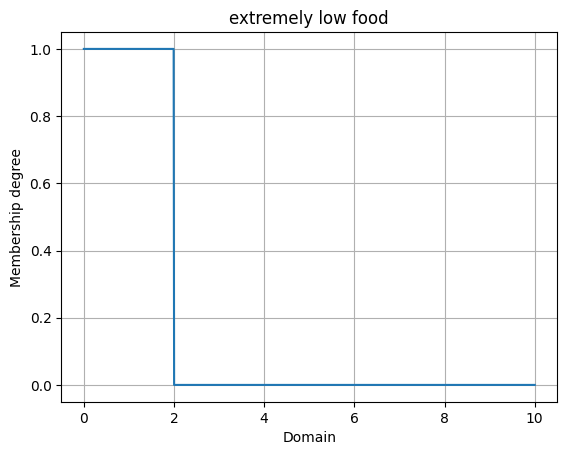

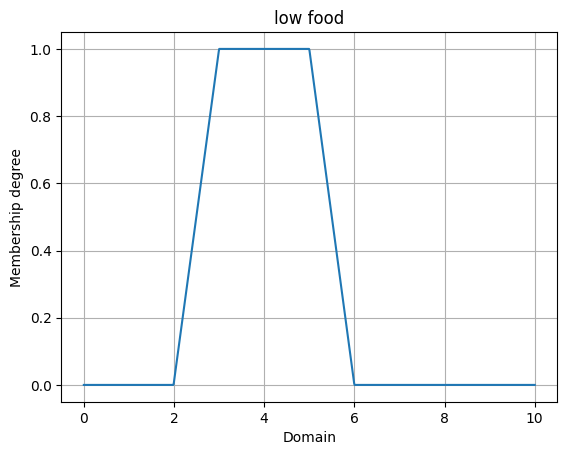

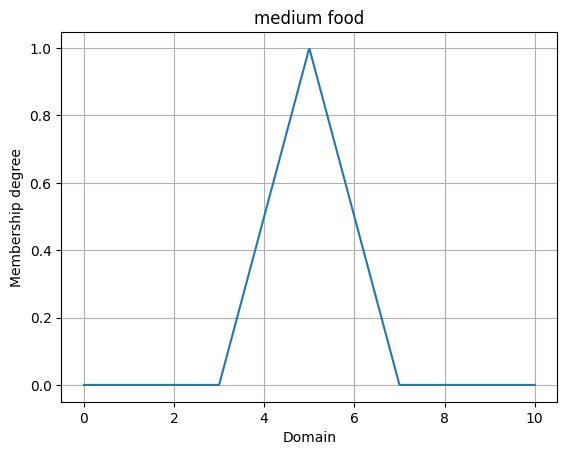

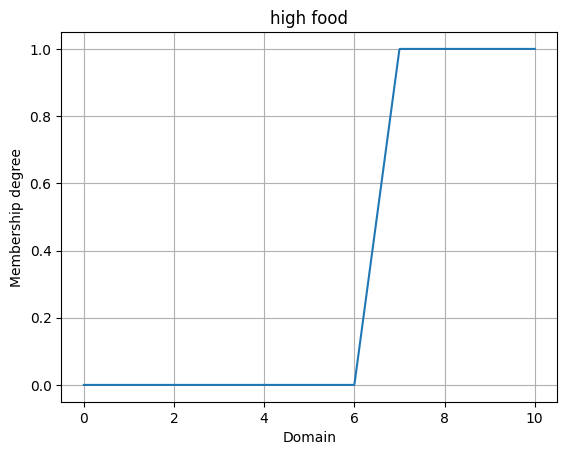

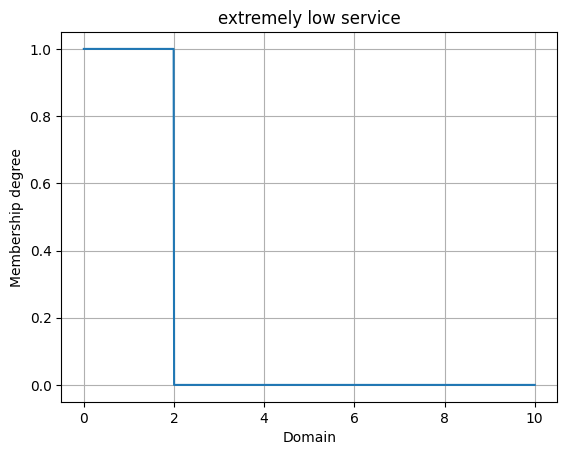

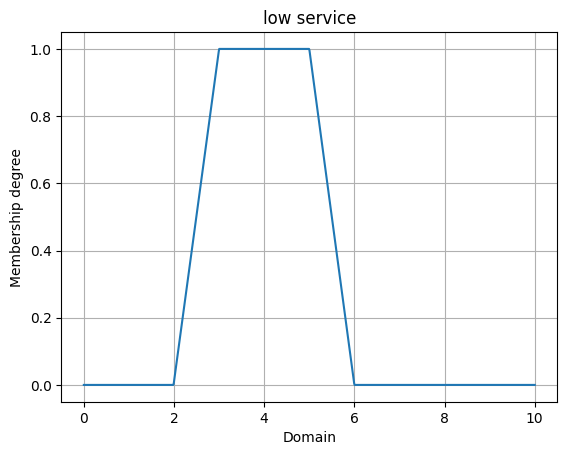

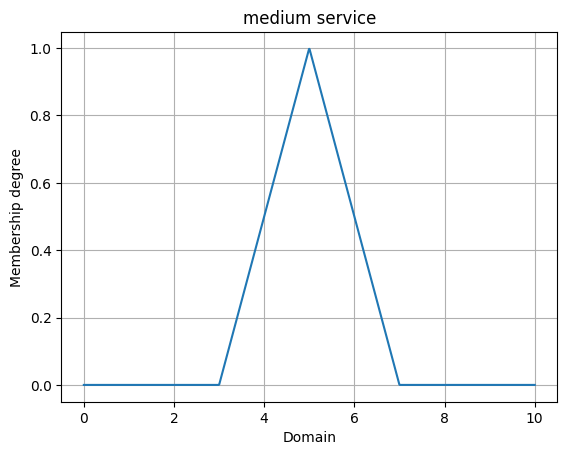

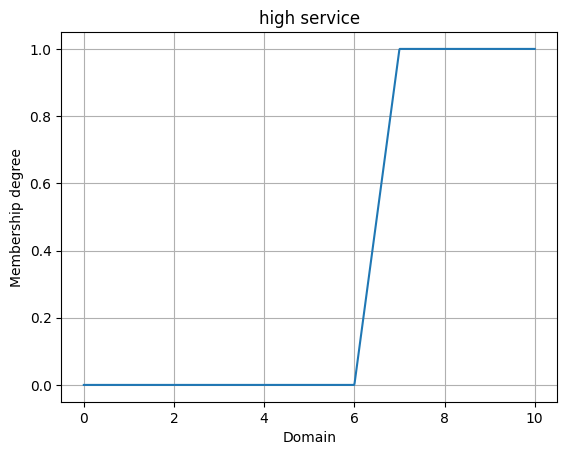

In [74]:
# wejście 1
# definiujemy zbiory rozmyte
# świadomie wykroczono poza uniwersum, gdyż biblioteka nie pozwala
# podać dwóch takich samych wartości obok siebie
extremely_low_food = T1FS(food_universe, trapezoid_mf, [-1, 0, 2 - 0.1e-10, 2, 1.0])
extremely_low_food.plot('extremely low food')
low_food = T1FS(food_universe, trapezoid_mf, [1.99, 3, 5, 6, 1.0])
low_food.plot('low food')
medium_food = T1FS(food_universe, tri_mf, [3, 5, 7, 1.0])
medium_food.plot('medium food')
high_food = T1FS(food_universe, trapezoid_mf, [6, 7, 10, 11, 1.0])
high_food.plot('high food')

# wejście 2
extremely_low_service = T1FS(service_universe, trapezoid_mf, [-1, 0, 2 - 0.1e-10, 2, 1.0])
extremely_low_service.plot('extremely low service')
low_service = T1FS(service_universe, trapezoid_mf, [1.99, 3, 5, 6, 1.0])
low_service.plot('low service')
medium_service = T1FS(service_universe, tri_mf, [3, 5, 7, 1.0])
medium_service.plot('medium service')
high_service = T1FS(service_universe, trapezoid_mf, [6, 7, 10, 11, 1.0])
high_service.plot('high service')

# definiujemy funkcje liniowe dwuargumentowe
# w przykładzie mamy 2 zmienne, zatem jest to funkcja dwóch zmiennych
# oraz parametru wolnego

# Funkcja stała reprezentująca brak napiwku
def zero_tip(x1, x2):
    return 0

def low_tip(x1, x2):
    return 0 + 0.5 * x1 + 0.5 * x2


def medium_tip(x1, x2):
    return 0 + 0.7 * x1 + 0.7 * x2


def high_tip(x1, x2):
    # pominięto tutaj współczynnki zmiennych, ale są po prostu równe 1
    return 0 + x1 + x2


# definiujemy sterownik rozmyty TSK
controller = T1TSK()
# są 2 wejścia, jedno wyjście
controller.add_input_variable('food')
controller.add_input_variable('service')
controller.add_output_variable('tip')

# reguły TSK
# poprzednik składa się tak jak we wnioskowaniu Mamdaniego
# ze zbiorów rozmytych połączych spójnikami rozmytymi
# natomiast następnik jest wcześniej zdefiniowaną funkcją

controller.add_rule([('food', extremely_low_food)], [('tip', zero_tip)])
controller.add_rule([('service', extremely_low_service)], [('tip', zero_tip)])

controller.add_rule([('food', low_food), ('service', low_service)], [('tip', low_tip)])
controller.add_rule([('food', low_food), ('service', medium_service)], [('tip', low_tip)])
controller.add_rule([('food', low_food), ('service', high_service)], [('tip', medium_tip)])

controller.add_rule([('food', medium_food), ('service', low_service)], [('tip', low_tip)])
controller.add_rule([('food', medium_food), ('service', medium_service)], [('tip', medium_tip)])
controller.add_rule([('food', medium_food), ('service', high_service)], [('tip', medium_tip)])

controller.add_rule([('food', high_food), ('service', low_service)], [('tip', medium_tip)])
controller.add_rule([('food', high_food), ('service', medium_service)], [('tip', high_tip)])
controller.add_rule([('food', high_food), ('service', high_service)], [('tip', high_tip)])

In [75]:
food, service = (1.99, 10)
it2out = controller.evaluate({"food": food, "service": service}, (food, service))
print(f"tip for food: {food} and service: {service} should be: {it2out['tip']:.2f}%") 

tip for food: 1.99 and service: 10 should be: 0.00%


# 2. W pewnym zakładzie produkcyjnym postanowiono ustalić specyficzny model wynagradzania pracowników. Jeżeli dany pracownik wykona do 50 sztuk produktu włącznie w ciągu godziny nie otrzymuje żadnej premii. Jeżeli przekroczy tę liczbę nieznacznie otrzymuje premię w wysokości 5zł za każdą dodatkowo wykonaną sztukę. Jeżeli przekroczy tę liczbę znacznie niech otrzyma 10zł za każdą dodatkowo wykonaną sztukę. W przypadkach pośrednich postanowiono zastosować jakąś kwotę pośrednią na bazie zaproponowanych  

### Zaproponuj model wnioskowania rozmytego TSK, który będzie wypłacał premię wg zadanych założeń.

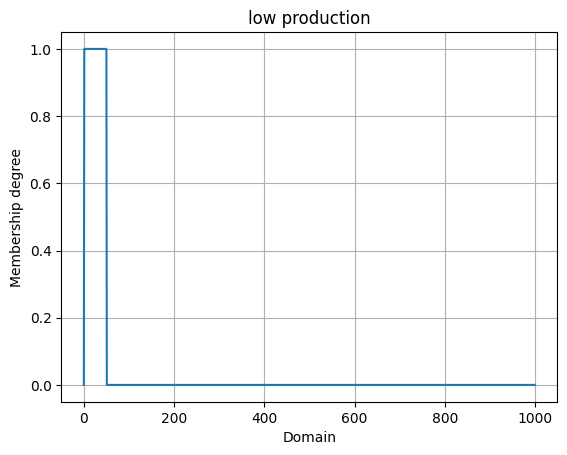

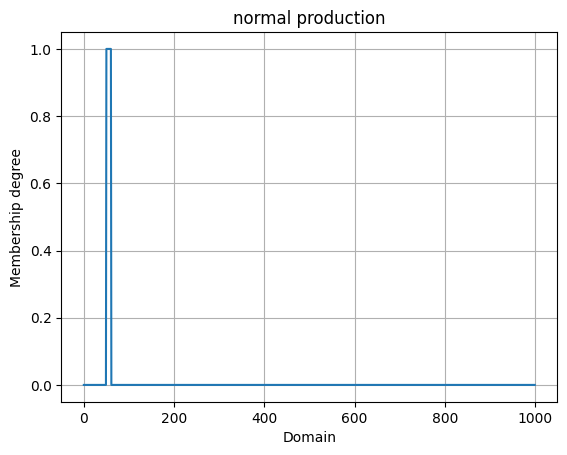

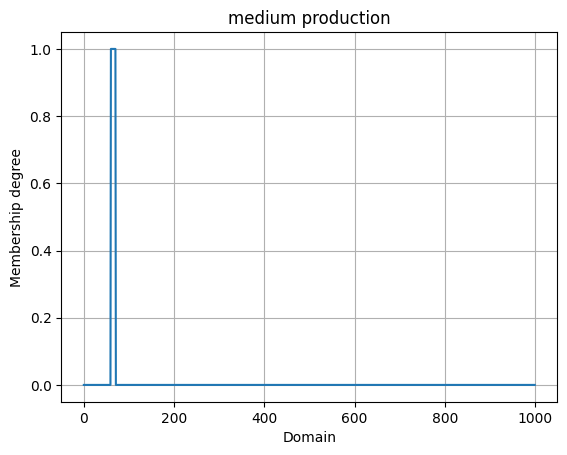

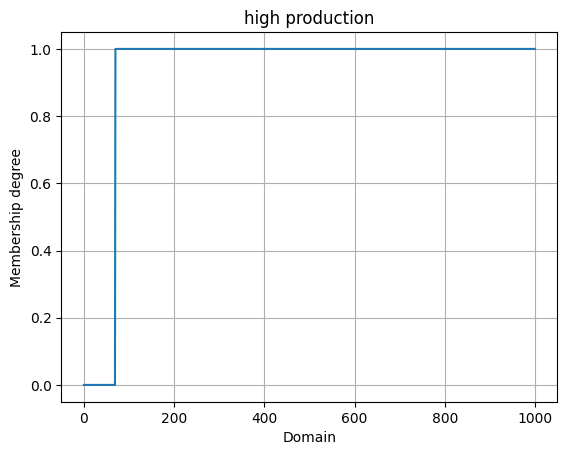

{'bonus': np.float64(62.5)}


In [76]:
products_universe = np.linspace(0, 999, 1000)

low_production = T1FS(products_universe, trapezoid_mf, [0.01, 0.02, 50, 50.1, 1.0])
normal_production = T1FS(products_universe, trapezoid_mf, [49.9, 50, 60, 60.1, 1.0])
medium_production = T1FS(products_universe, trapezoid_mf, [59.9, 60, 70, 70.1, 1.0])
high_production = T1FS(products_universe, trapezoid_mf, [69.9, 70, 999, 1000, 1.0])

low_production.plot('low production')
normal_production.plot('normal production')
medium_production.plot('medium production')
high_production.plot('high production')

def zero_bonus(products):
    return 0

def low_bonus(products):
    return 5 * (products - 50) 

def medium_bonus(products):
    return 7.5 * (products - 50)  

def high_bonus(products):
    return 10 * (products - 50) 

controller = T1TSK()
controller.add_input_variable('products')  
controller.add_output_variable('bonus')    

controller.add_rule([('products', low_production)], [('bonus', zero_bonus)])
controller.add_rule([('products', normal_production)], [('bonus', low_bonus)])
controller.add_rule([('products', medium_production)], [('bonus', medium_bonus)])
controller.add_rule([('products', high_production)], [('bonus', high_bonus)])

example_productivity = 60
bonus = controller.evaluate({'products': example_productivity}, [example_productivity])
print(bonus)
plt.show()


### Następnie dodaj jeszcze następującą logikę: jeżeli pracownik nie wykona w ciągu godziny żadnego produktu, powinien otrzymać upomnienie w postaci -20zł (tj. przykładowej minimalnej stawki godzinowej).

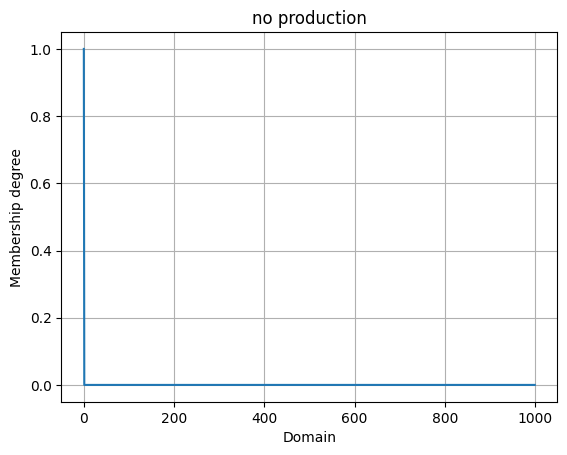

{'bonus': np.float64(-20.0)}


In [77]:
no_production = T1FS(products_universe, tri_mf, [-1, 0, 0.01, 1.0])
no_production.plot("no production")

def penalty(products):
    return -20  

controller.add_rule([('products', no_production)], [('bonus', penalty)])

example_productivity = 0
bonus = controller.evaluate({'products': example_productivity}, [example_productivity])
print(bonus)

### Zastanów się, czy zaproponowany przez Ciebie model uwzględnia sytuację ponadprzeciętnej produktywności pracownika, który np. przekroczy liczbę 10 wyprodukowanych sztuk. Jeżeli tak nie jest, skoryguj system.

Zakladam, ze chodzilo o 100 sztuk. Tak model zaklada taka sytuacje.

# 3. Napisz system wnioskowania rozmytego TSK, który wyceni wartość mieszkania w złotych, uwzględniając metraż, odległość w km od ścisłego centrum miasta, wiek budynku w latach. Nie uwzględniaj cech szczegółowych budynku (np. bieżący stan, wykonanie/niewykonywanie remontów itd.).


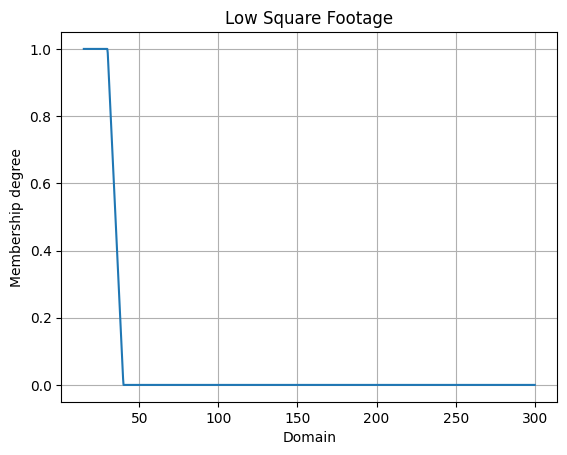

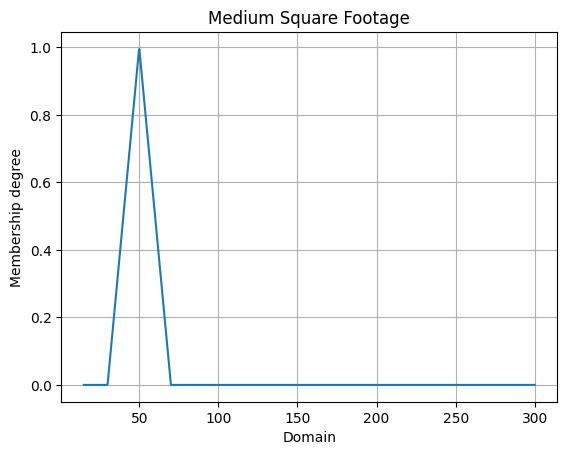

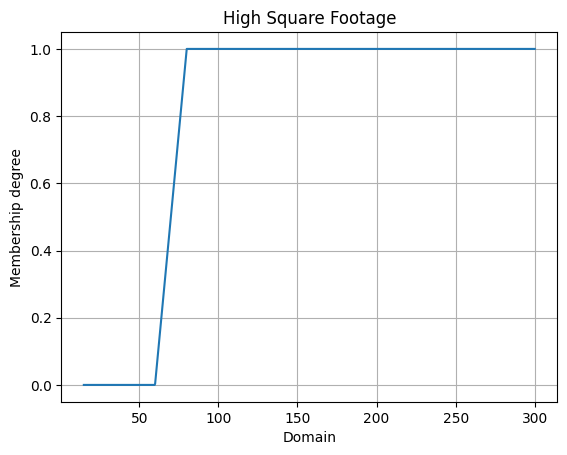

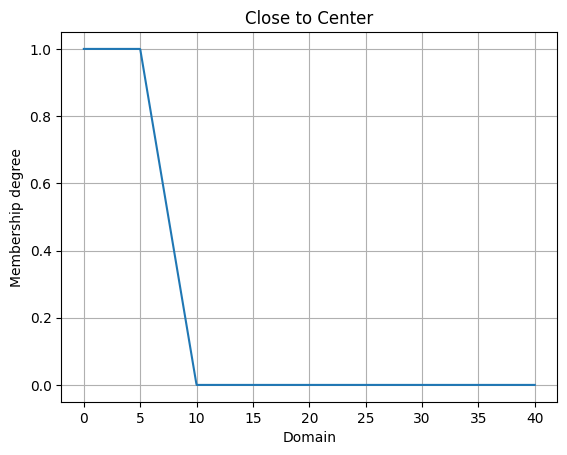

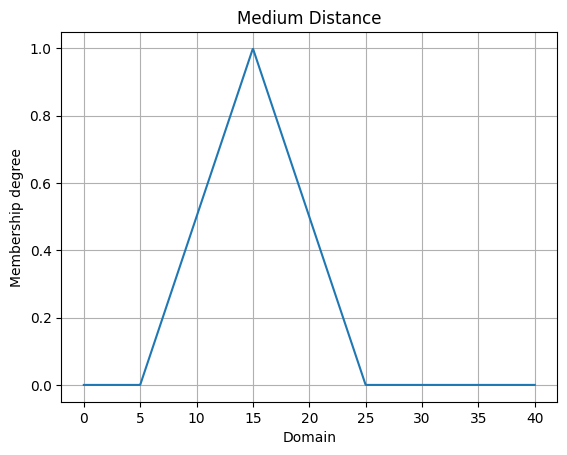

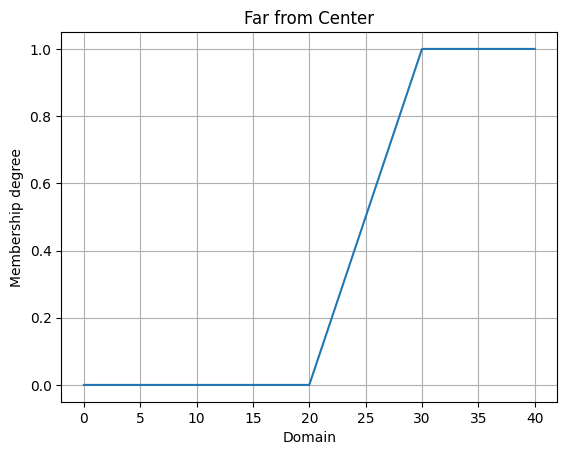

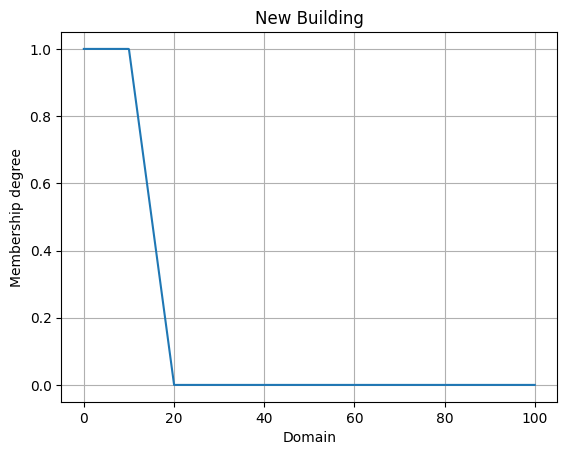

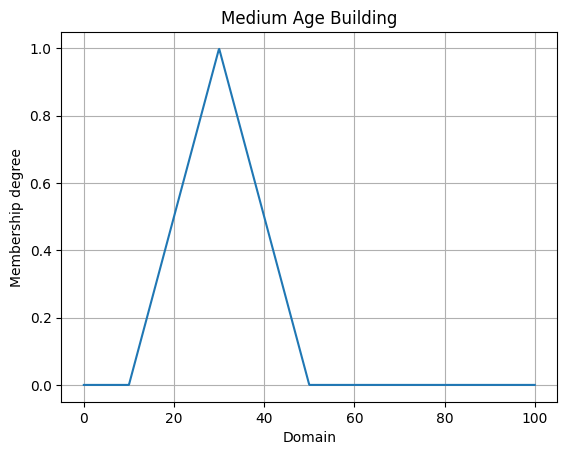

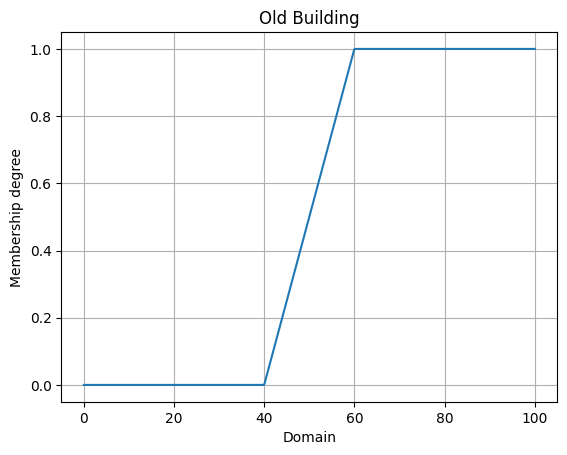

Szacowana cena mieszkania: 910000.00 zł


In [78]:
square_footage_universe = np.linspace(15, 300, 1000)
distance_from_center_universe = np.linspace(0, 40, 1000)
age_universe = np.linspace(0, 100, 1000)

def low_price(x0, x1, x2):
    return 8000 * x0 - 10000 * x1 - 10000 * x2

def medium_price(x0, x1, x2):
    return 12000 * x0 - 8000 * x1 - 8000 * x2

def high_price(x0, x1, x2):
    return 15000 * x0 - 5000 * x1 - 5000 * x2

low_square_footage = T1FS(square_footage_universe, trapezoid_mf, [10, 15, 30, 40, 1.0])
medium_square_footage = T1FS(square_footage_universe, tri_mf, [30, 50, 70, 1.0])
high_square_footage = T1FS(square_footage_universe, trapezoid_mf, [60, 80, 300, 301, 1.0])
low_square_footage.plot('Low Square Footage')
medium_square_footage.plot('Medium Square Footage')
high_square_footage.plot('High Square Footage')

close_to_center = T1FS(distance_from_center_universe, trapezoid_mf, [-1, 0, 5, 10, 1.0])
medium_distance = T1FS(distance_from_center_universe, tri_mf, [5, 15, 25, 1.0])
far_from_center = T1FS(distance_from_center_universe, trapezoid_mf, [20, 30, 40, 41, 1.0])
close_to_center.plot('Close to Center')
medium_distance.plot('Medium Distance')
far_from_center.plot('Far from Center')

new_building = T1FS(age_universe, trapezoid_mf, [-1, 0, 10, 20, 1.0])
medium_age_building = T1FS(age_universe, tri_mf, [10, 30, 50, 1.0])
old_building = T1FS(age_universe, trapezoid_mf, [40, 60, 100, 101, 1.0])
new_building.plot('New Building')
medium_age_building.plot('Medium Age Building')
old_building.plot('Old Building')

controller = T1TSK()

controller.add_input_variable('square_footage')
controller.add_input_variable('distance_from_center')
controller.add_input_variable('age')
controller.add_output_variable('price')

controller.add_rule([('square_footage', low_square_footage), ('distance_from_center', close_to_center), ('age', new_building)], [('price', medium_price)])
controller.add_rule([('square_footage', low_square_footage), ('distance_from_center', close_to_center), ('age', medium_age_building)], [('price', low_price)])
controller.add_rule([('square_footage', low_square_footage), ('distance_from_center', close_to_center), ('age', old_building)], [('price', low_price)])
controller.add_rule([('square_footage', low_square_footage), ('distance_from_center', medium_distance), ('age', new_building)], [('price', medium_price)])
controller.add_rule([('square_footage', low_square_footage), ('distance_from_center', medium_distance), ('age', medium_age_building)], [('price', low_price)])
controller.add_rule([('square_footage', low_square_footage), ('distance_from_center', medium_distance), ('age', old_building)], [('price', low_price)])
controller.add_rule([('square_footage', low_square_footage), ('distance_from_center', far_from_center), ('age', new_building)], [('price', low_price)])
controller.add_rule([('square_footage', low_square_footage), ('distance_from_center', far_from_center), ('age', medium_age_building)], [('price', low_price)])
controller.add_rule([('square_footage', low_square_footage), ('distance_from_center', far_from_center), ('age', old_building)], [('price', low_price)])

controller.add_rule([('square_footage', medium_square_footage), ('distance_from_center', close_to_center), ('age', new_building)], [('price', high_price)])
controller.add_rule([('square_footage', medium_square_footage), ('distance_from_center', close_to_center), ('age', medium_age_building)], [('price', medium_price)])
controller.add_rule([('square_footage', medium_square_footage), ('distance_from_center', close_to_center), ('age', old_building)], [('price', medium_price)])
controller.add_rule([('square_footage', medium_square_footage), ('distance_from_center', medium_distance), ('age', new_building)], [('price', high_price)])
controller.add_rule([('square_footage', medium_square_footage), ('distance_from_center', medium_distance), ('age', medium_age_building)], [('price', medium_price)])
controller.add_rule([('square_footage', medium_square_footage), ('distance_from_center', medium_distance), ('age', old_building)], [('price', low_price)])
controller.add_rule([('square_footage', medium_square_footage), ('distance_from_center', far_from_center), ('age', new_building)], [('price', medium_price)])
controller.add_rule([('square_footage', medium_square_footage), ('distance_from_center', far_from_center), ('age', medium_age_building)], [('price', low_price)])
controller.add_rule([('square_footage', medium_square_footage), ('distance_from_center', far_from_center), ('age', old_building)], [('price', low_price)])

controller.add_rule([('square_footage', high_square_footage), ('distance_from_center', close_to_center), ('age', new_building)], [('price', high_price)])
controller.add_rule([('square_footage', high_square_footage), ('distance_from_center', close_to_center), ('age', medium_age_building)], [('price', high_price)])
controller.add_rule([('square_footage', high_square_footage), ('distance_from_center', close_to_center), ('age', old_building)], [('price', medium_price)])
controller.add_rule([('square_footage', high_square_footage), ('distance_from_center', medium_distance), ('age', new_building)], [('price', high_price)])
controller.add_rule([('square_footage', high_square_footage), ('distance_from_center', medium_distance), ('age', medium_age_building)], [('price', high_price)])
controller.add_rule([('square_footage', high_square_footage), ('distance_from_center', medium_distance), ('age', old_building)], [('price', medium_price)])
controller.add_rule([('square_footage', high_square_footage), ('distance_from_center', far_from_center), ('age', new_building)], [('price', medium_price)])
controller.add_rule([('square_footage', high_square_footage), ('distance_from_center', far_from_center), ('age', medium_age_building)], [('price', medium_price)])
controller.add_rule([('square_footage', high_square_footage), ('distance_from_center', far_from_center), ('age', old_building)], [('price', low_price)])

example_square_footage = 70
example_distance = 8       
example_age = 20            

predicted_price = controller.evaluate({
    'square_footage': example_square_footage,
    'distance_from_center': example_distance,
    'age': example_age
}, [example_square_footage, example_distance, example_age])['price']

print(f"Szacowana cena mieszkania: {predicted_price:.2f} zł")

# 4. Przeanalizuj przykład tipper_iv.py. Ponownie jest to klasyczny przykład wnioskowania rozmytego, ale tym razem jest to przedziałowe wnioskowanie Mamdaniego.

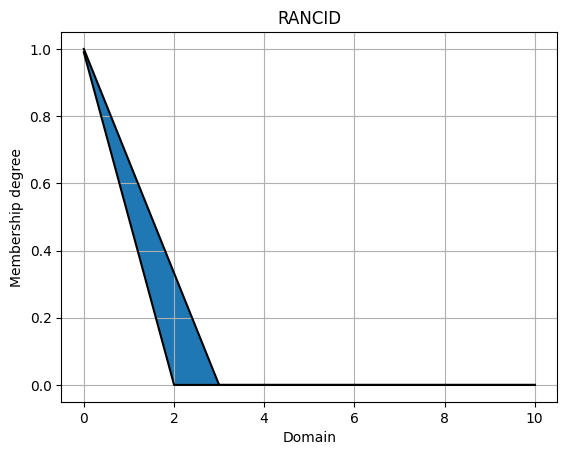

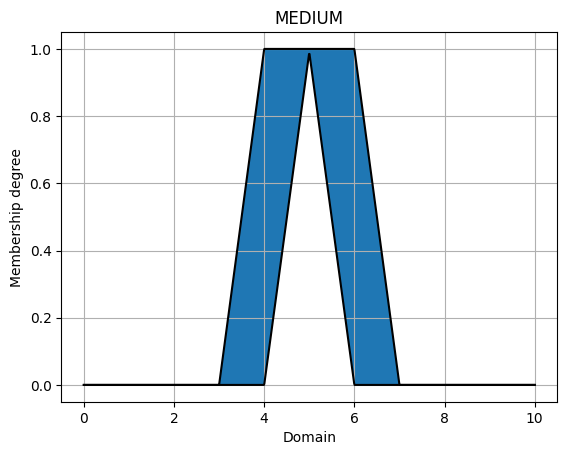

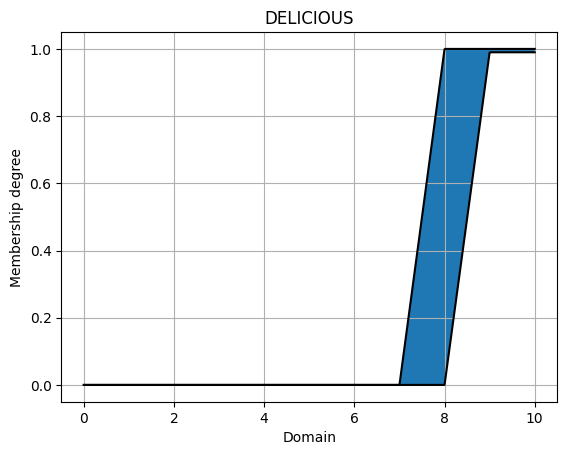

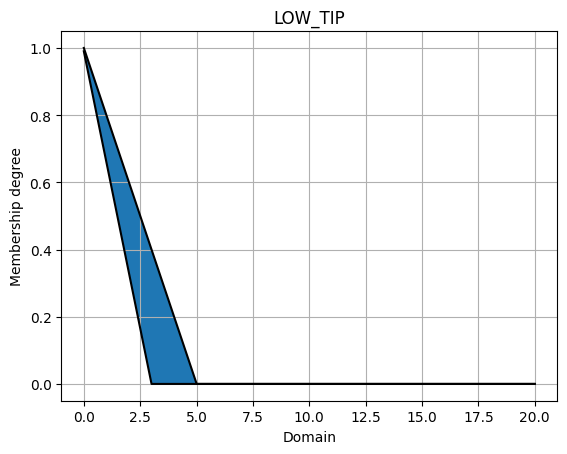

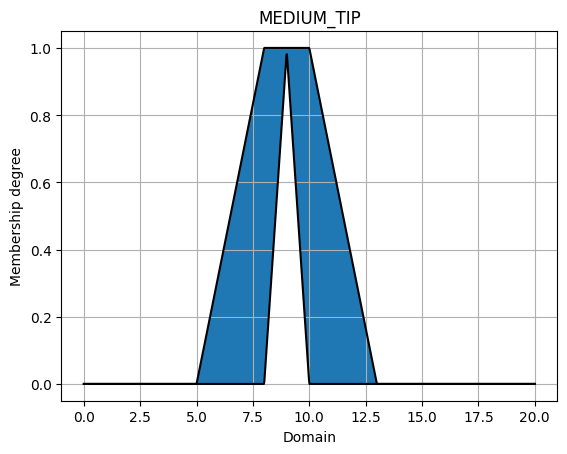

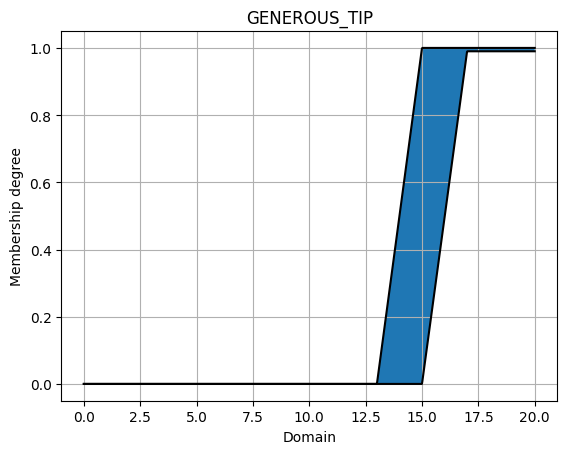

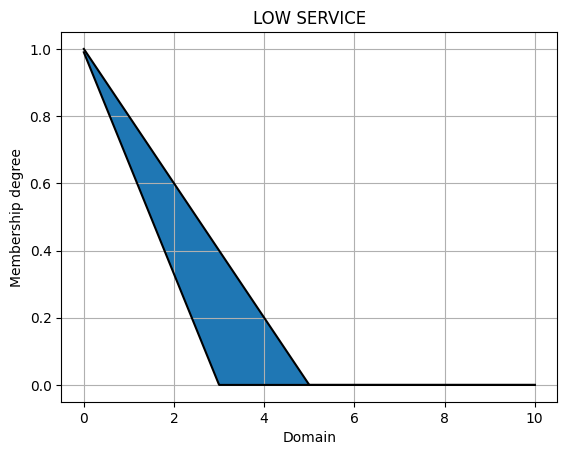

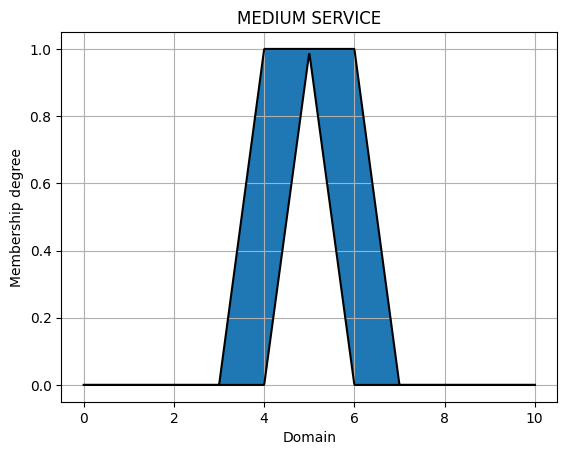

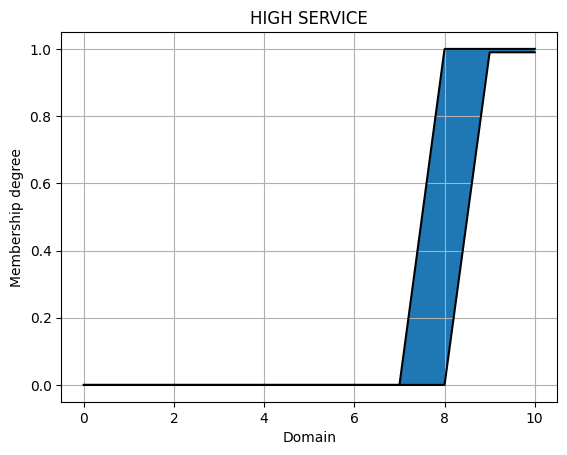

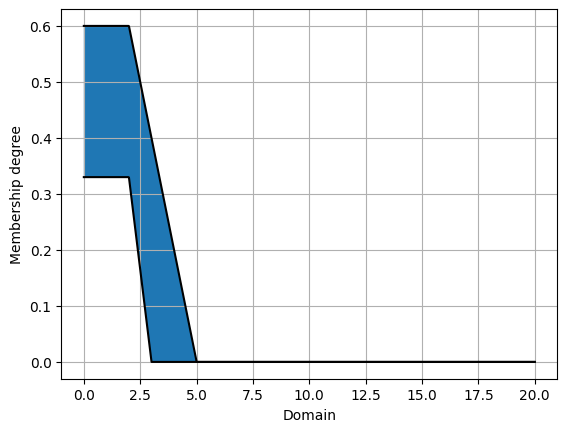

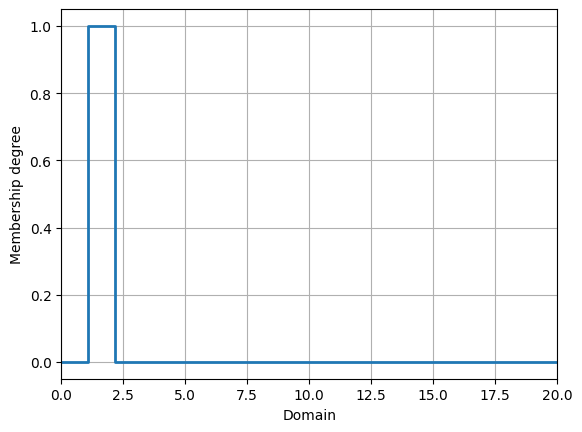

tip 1.6112109736954807


In [79]:
from pyit2fls import Mamdani, min_t_norm, max_s_norm, IT2FS, tri_mf, trapezoid_mf, ltri_mf, rtri_mf, TR_plot, crisp

# definiujemy uniwersum - czyli zbiór ostry
# dla którego definiujemy funkcje przynależności
# do zbiorów przedziałowo-rozmytych

# definiujemy że uniwersum jakości jedzenia to zbiór od 0 do 10 (skala punktowa)
food_universe = np.linspace(0.0, 10.0, 1000)
# definiujemy że uniwersum napiwku to procenty od 0 do 20
tip_universe = np.linspace(0.0, 20.0, 1000)
# definiujemy że uniwersum jakosci obsługi to zbiór od 0 do 10
service_universe = np.linspace(0.0, 10.0, 1000)

# funkcje przynależności to dwie right triangular membership function
# o zadanych parametrach
rancid = IT2FS(food_universe, rtri_mf, [3, 0, 1.0], rtri_mf, [2, 0, 0.99])
rancid.plot(title='RANCID')

# górna funkcja przynależności to funkcja trapezoidalna, natomiast dolna
# to funkcja trójkątna
medium = IT2FS(food_universe, trapezoid_mf, [3, 4, 6, 7, 1.0], tri_mf, [4, 5, 6, 0.99])
medium.plot(title='MEDIUM')

# funkcje przynależności to dwie left triangular membership function
# o zadanych parametrach
delicious = IT2FS(food_universe, ltri_mf, [7, 8, 1.0], ltri_mf, [8, 9, 0.99])
delicious.plot(title='DELICIOUS')

low_tip = IT2FS(tip_universe, rtri_mf, [5, 0, 1.0], rtri_mf, [3, 0, 0.99])
low_tip.plot(title='LOW_TIP')

medium_tip = IT2FS(tip_universe, trapezoid_mf, [5, 8, 10, 13, 1.0], tri_mf, [8, 9, 10, 0.99])
medium_tip.plot(title='MEDIUM_TIP')

generous_tip = IT2FS(tip_universe, ltri_mf, [13, 15, 1.0], ltri_mf, [15, 17, 0.99])
generous_tip.plot(title='GENEROUS_TIP')

low_service = IT2FS(service_universe, rtri_mf, [5, 0, 1.0], rtri_mf, [3, 0, 0.99])
low_service.plot(title='LOW SERVICE')
medium_service = IT2FS(service_universe, trapezoid_mf, [3, 4, 6, 7, 1.0], tri_mf, [4, 5, 6, 0.99])
medium_service.plot(title='MEDIUM SERVICE')
high_service = IT2FS(service_universe, ltri_mf, [7, 8, 1.0], ltri_mf, [8, 9, 0.99])
high_service.plot(title='HIGH SERVICE')

plt.show()

# definiujemy sterownik rozmyty
controller = Mamdani(t_norm=min_t_norm, s_norm=max_s_norm)
# są 2 wejścia, jedno wyjście
controller.add_input_variable('food')
controller.add_input_variable('service')
controller.add_output_variable('tip')

# definiujemy reguły rozmyte
# spójnik pomiędzy wejściami to and
controller.add_rule([('food', rancid), ('service', low_service)], [('tip', low_tip)])
controller.add_rule([('food', rancid), ('service', medium_service)], [('tip', low_tip)])
controller.add_rule([('food', rancid), ('service', high_service)], [('tip', low_tip)])

controller.add_rule([('food', medium), ('service', low_service)], [('tip', medium_tip)])
controller.add_rule([('food', medium), ('service', medium_service)], [('tip', medium_tip)])
controller.add_rule([('food', medium), ('service', high_service)], [('tip', medium_tip)])

controller.add_rule([('food', delicious), ('service', low_service)], [('tip', medium_tip)])
controller.add_rule([('food', delicious), ('service', medium_service)], [('tip', generous_tip)])
controller.add_rule([('food', delicious), ('service', high_service)], [('tip', generous_tip)])

# podajemy ostre wejścia i uzyskujemy wyjście
it2out, tr = controller.evaluate({"food": 0.0, "service": 2.0})
it2out["tip"].plot()
TR_plot(tip_universe, tr["tip"])
# wypisujemy wyjście po defuzzyfikacji
print('tip', crisp(tr["tip"]))

### Przeanalizuj zbiór RANCID, Jaka jest przynależność do tego zbioru dla 0, a jaka dla 2?

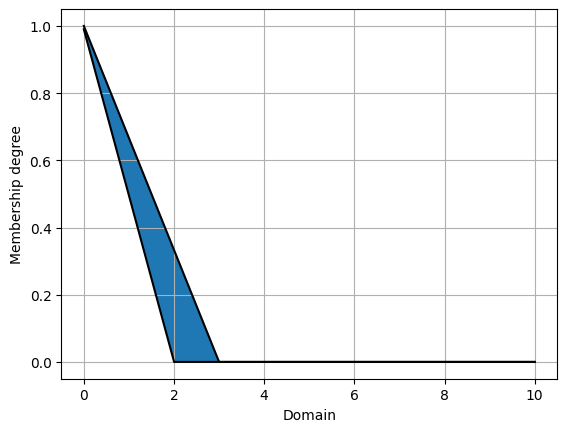

Wartosci dla 0 = dolna: 0.99 gorna: 1.0
Wartosci dla 2 = dolna: 0.0 gorna: 0.33266599933266594


In [80]:
rancid.plot()
print(f"Wartosci dla 0 = dolna: {rancid.lower[0]} gorna: {rancid.upper[0]}")
print(f"Wartosci dla 2 = dolna: {rancid.lower[200]} gorna: {rancid.upper[200]}") # linespace ma 1000 punktow, a zakres wartosci to od 0-10, zatem dla argumentu 2 mamy indeks 200

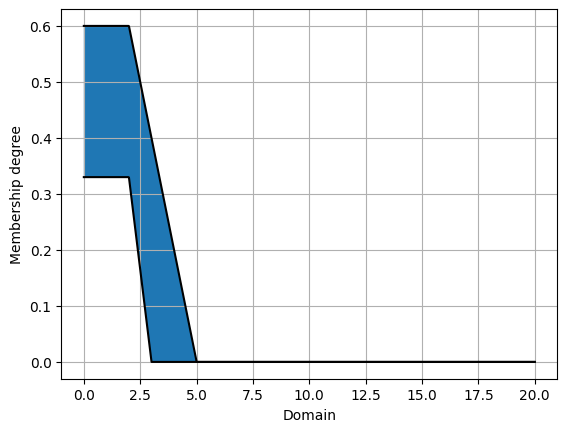

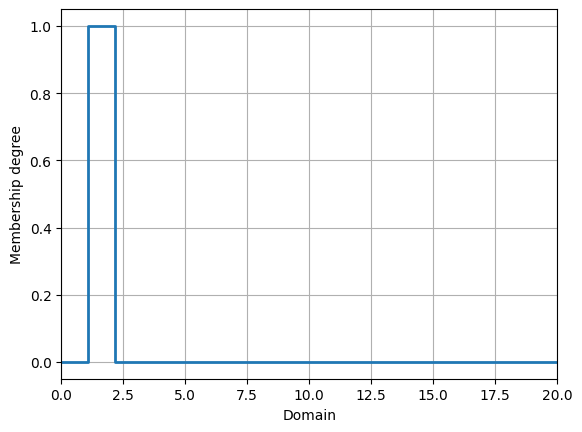

tip 1.6112109736954807


In [81]:
# podajemy ostre wejścia i uzyskujemy wyjście
it2out, tr = controller.evaluate({"food": 0.0, "service": 2.0})
it2out["tip"].plot()
TR_plot(tip_universe, tr["tip"])
# wypisujemy wyjście po defuzzyfikacji
print('tip', crisp(tr["tip"]))


--- Scenario 1 ---


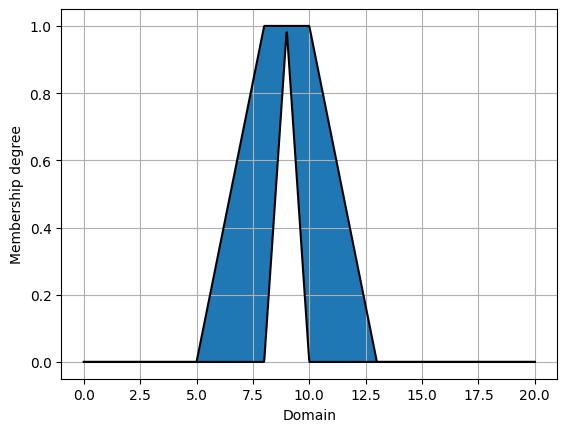

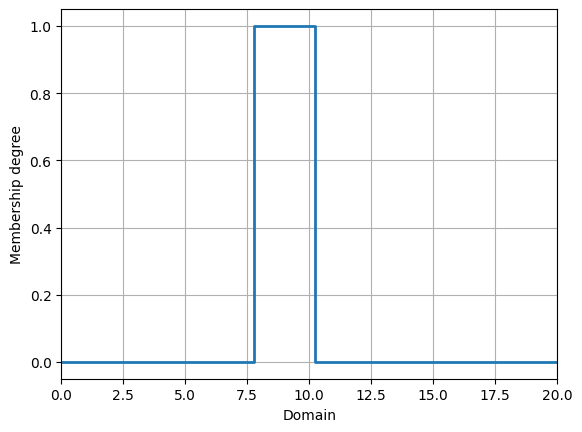

tip 9.000005540576788

--- Scenario 2 ---


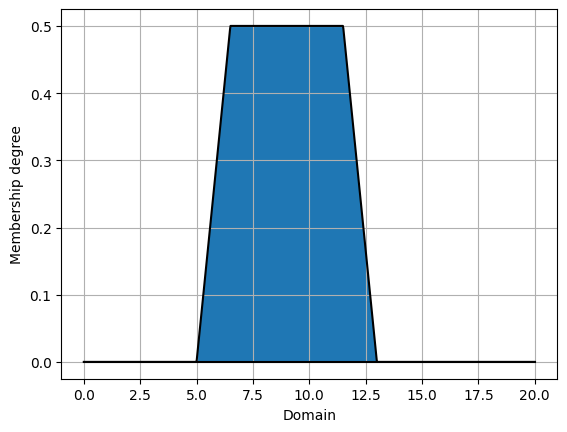

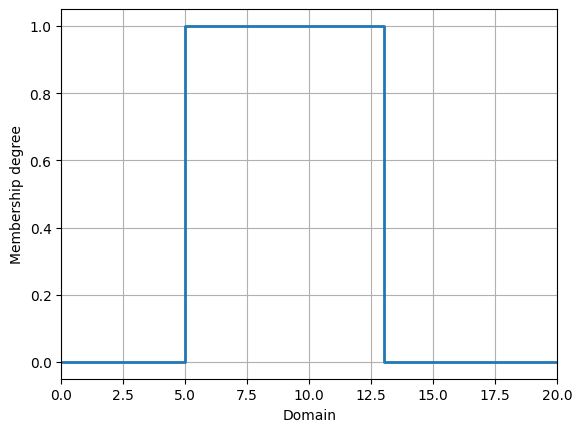

tip 8.998998998999


In [82]:
test_scenarios = [
    {"food": 5.0, "service": 5.0},  # Niewielka niepewność
    {"food": 3.5, "service": 3.5}   # Większa niepewność
]

for idx, inputs in enumerate(test_scenarios):
    print(f"\n--- Scenario {idx + 1} ---")
    it2out, tr = controller.evaluate(inputs)
    it2out["tip"].plot()
    TR_plot(tip_universe, tr["tip"])
    tip_value = crisp(tr["tip"])
    print('tip', crisp(tr["tip"]))
    # print(f'For inputs (food={inputs["food"]}, service={inputs["service"]}), the defuzzified tip is: {tip_value:.2f}')
plt.show()

Gdy niepewnosc zmiennych wejsciowych  jest wieksza, wtedy tez niepewnosc wyniku jest wieksza.